###**Mahasigma Team:**
- Davis Maulana Hermanto (06)
- Fahruddin Zaim Ibrahim (09)
- Hawa Esanda (11)
- Maulia Balqis Ansya Aulia (15)

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [1]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=50, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 12
Data dimension: (1560, 62, 47, 3)
Images flatten dimension: (1560, 8742)


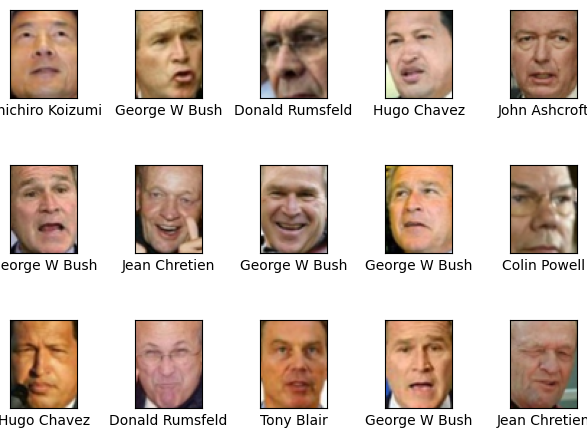

In [5]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

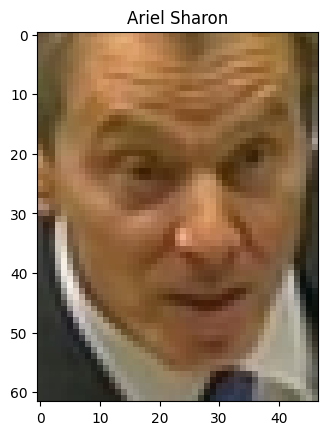

In [20]:
plt.imshow(faces.images[0])
plt.title(faces.target_names[0])
plt.show()

# Preprocessing

In [7]:
# Fungsi untuk memeriksa apakah semua gambar memiliki ukuran yang sama
def size_check(data):
    for i in range(len(data)):
        if data[i].shape != data[0].shape:
            print(f'Image {i} has different size')
            return False
    print('All images have the same size')
    return True

# Fungsi untuk memeriksa apakah semua gambar adalah RGB
def color_check(data):
    for i in range(len(data)):
        if data[i].shape[-1] != 3:
            print(f'Image {i} is not RGB')
            return False
    print('All images are RGB')
    return True

# Jalankan pemeriksaan
size_check(faces.images)
color_check(faces.images)

# Periksa jumlah label
label = np.bincount(faces.target)
print(f"Jumlah label unik: {label.shape[0]}")

All images have the same size
All images are RGB
Jumlah label unik: 12


# Features Extraction

In [19]:
# Step 2: Fungsi untuk ekstraksi histogram dari tiap channel (R, G, B)
def extract_histograms(images, bins_num=5, range=(0, 256)):
    hist_features = []
    for img in images:
        # Pisahkan gambar ke dalam tiga channel: R, G, B
        R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

        # Hitung histogram untuk tiap channel menggunakan np.histogram
        hist_r, _ = np.histogram(R, bins=bins_num, range=range)
        hist_g, _ = np.histogram(G, bins=bins_num, range=range)
        hist_b, _ = np.histogram(B, bins=bins_num, range=range)

        # Normalisasi histogram (opsional, tergantung kebutuhan)
        hist_r = hist_r / hist_r.sum()
        hist_g = hist_g / hist_g.sum()
        hist_b = hist_b / hist_b.sum()

        # Gabungkan histogram dari tiap channel menjadi satu vektor fitur
        hist_features.append(np.concatenate([hist_r, hist_g, hist_b]))

    return np.array(hist_features)

# Step 3: Ekstraksi fitur histogram
X_hist = extract_histograms(faces.images)

# Cek hasil ekstraksi fitur
print(f"Shape of histogram features: {X_hist.shape}")

Shape of histogram features: (1560, 15)


# Build Model

In [26]:
# Step 1: Membagi data menjadi data training dan testing
# Asumsi X_hist adalah fitur histogram dan labels adalah target dari dataset
X_train, X_test, y_train, y_test = train_test_split(X_hist, faces.target, test_size=0.3, random_state=42, stratify=faces.target)

# Step 2: Pembuatan objek model SVM
# Menggunakan SVM dengan kernel linear (bisa juga menggunakan kernel lain seperti 'rbf', 'poly', dll)
svm_model = SVC(kernel='linear', random_state=42)

# Step 3: Proses fitting model (melatih model menggunakan data training)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Evaluation

In [28]:
# Evaluasi pada data training
y_train_predict = svm_model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_predict)

# Evaluasi pada data testing
y_test_predict = svm_model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_predict)

# Print hasil akurasi
print(f'Accuracy on Train: {acc_train:.2%}')
print(f'Accuracy on Test: {acc_test:.2%}')

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_test_predict, target_names=faces.target_names))

Accuracy on Train: 33.97%
Accuracy on Test: 33.97%
Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        23
     Colin Powell       0.00      0.00      0.00        71
  Donald Rumsfeld       0.00      0.00      0.00        36
    George W Bush       0.34      1.00      0.51       159
Gerhard Schroeder       0.00      0.00      0.00        33
      Hugo Chavez       0.00      0.00      0.00        21
   Jacques Chirac       0.00      0.00      0.00        16
    Jean Chretien       0.00      0.00      0.00        16
    John Ashcroft       0.00      0.00      0.00        16
Junichiro Koizumi       0.00      0.00      0.00        18
  Serena Williams       0.00      0.00      0.00        16
       Tony Blair       0.00      0.00      0.00        43

         accuracy                           0.34       468
        macro avg       0.03      0.08      0.04       468
     weighted avg       0.12      0.34 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(113.92222222222219, 0.5, 'predicted label')

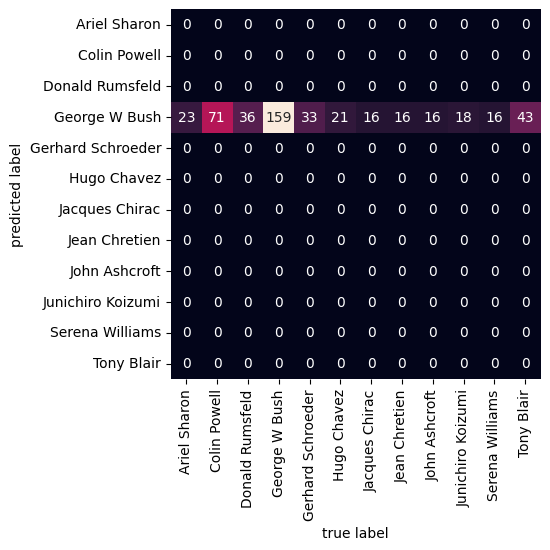

In [30]:
# Eval Confusion Matrix
mat = confusion_matrix(y_test, y_test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Features Extraction 2

In [43]:
from skimage.feature import hog
from skimage import color

# Fungsi untuk ekstraksi fitur HOG dari gambar
def extract_hog_features(images):
    hog_features = []
    for img in images:

        # Ekstraksi fitur HOG
        hog_feature = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False, channel_axis=-1)

        hog_features.append(hog_feature)
    return np.array(hog_features)

# Ekstraksi fitur HOG
X_hog = extract_hog_features(faces.images)
print(f'Shape of HOG features: {X_hog.shape}')

Shape of HOG features: (1560, 864)


# Build Model 2

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_hog, faces.target, test_size=0.3, random_state=42, stratify=faces.target)

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluation 2

Accuracy on Train (Random Forest): 100.00%
Accuracy on Test (Random Forest): 55.13%
F1-Score (Random Forest): 0.46


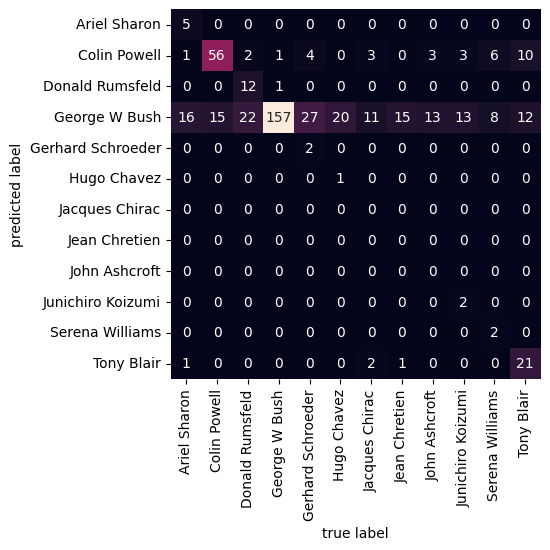

In [44]:
from sklearn.metrics import confusion_matrix, f1_score
# Evaluasi pada data training
y_train_predict_rf = rf_model.predict(X_train)
acc_train_rf = accuracy_score(y_train, y_train_predict_rf)

# Evaluasi pada data testing
y_test_predict_rf = rf_model.predict(X_test)
acc_test_rf = accuracy_score(y_test, y_test_predict_rf)

# Print hasil akurasi
print(f'Accuracy on Train (Random Forest): {acc_train_rf:.2%}')
print(f'Accuracy on Test (Random Forest): {acc_test_rf:.2%}')

# Eval Confusion Matrix
mat = confusion_matrix(y_test, y_test_predict_rf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# F1-Score
f1_rf = f1_score(y_test, y_test_predict_rf, average='weighted')
print(f'F1-Score (Random Forest): {f1_rf:.2f}')
